In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPool2D
from keras import backend as k
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


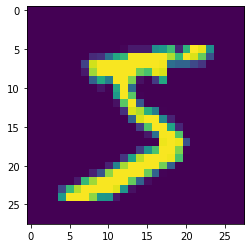

In [16]:
plt.imshow(x_train[0])

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

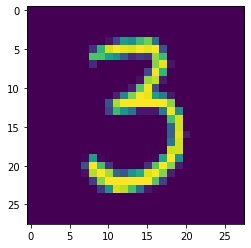

In [21]:
plt.imshow(x_train[50])

In [22]:
y_train[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [3]:
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)

input_shape = (28 , 28 , 1)
num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train , num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test , num_classes)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=input_shape))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes , activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

print("The model has successfully trained")

2021-10-06 18:35:48.345515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-06 18:35:48.345566: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-06 18:35:48.345595: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ews): /proc/driver/nvidia/version does not exist
2021-10-06 18:35:48.345886: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-06 18:35:48.700864: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimizati

Epoch 1/10
469/469 [==============================] - 97s 204ms/step - loss: 2.2676 - accuracy: 0.1695 - val_loss: 2.2215 - val_accuracy: 0.4258
Epoch 2/10
469/469 [==============================] - 100s 214ms/step - loss: 2.1896 - accuracy: 0.3105 - val_loss: 2.1205 - val_accuracy: 0.5952
Epoch 3/10
469/469 [==============================] - 103s 219ms/step - loss: 2.0797 - accuracy: 0.4326 - val_loss: 1.9753 - val_accuracy: 0.6894
Epoch 4/10
469/469 [==============================] - 98s 210ms/step - loss: 1.9214 - accuracy: 0.5363 - val_loss: 1.7705 - val_accuracy: 0.7489
Epoch 5/10
469/469 [==============================] - 103s 220ms/step - loss: 1.7184 - accuracy: 0.6072 - val_loss: 1.5167 - val_accuracy: 0.7858
Epoch 6/10
469/469 [==============================] - 106s 226ms/step - loss: 1.4852 - accuracy: 0.6558 - val_loss: 1.2510 - val_accuracy: 0.8093
Epoch 7/10
469/469 [==============================] - 106s 225ms/step - loss: 1.2667 - accuracy: 0.6907 - val_loss: 1.0211 - v

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('DigitModel.h5')
print("Saving the model as DigitModel.h5")

Test loss: 0.6516439914703369
Test accuracy: 0.8539999723434448
Saving the model as DigitModel.h5


In [18]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
from PIL import Image ,  ImageTk
import numpy as np
import easygui as eg



model = load_model('DigitModel.h5')

def predict_image(img) :
    img = img.resize((28 , 28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1 , 28 , 28 , 1)
    img = img / 255.0
    #predicting the class of image
    res = model.predict([img])[0]
    return (np.argmax(res) , max(res))


class App(tk.Tk) :
    def __init__(self) :
        tk.Tk.__init__(self)
        self.x = self.y = 0
        
        
        # Creating elements
        #self.canvas = tk.Canvas(self , width = 600 , height = 600 , bg = 'white' , cursor = 'cross')
        self.label = tk.Label(self , text = 'Prediction' , font = ("Helvetica", 25))
        self.select_btn = tk.Button(self , text = "Select", command = self.select_image)
        self.clear_btn = tk.Button(self , text = 'Clear' , command = self.clear_all)
        self.show_btn = tk.Button(self , text = 'Show' , command = self.show_image)
        self.classify_btn = tk.Button(self , text = 'Recognize' , command = self.classify_image)
        #self.path_label = tk.Label(self , text = 'Your Image Path' , font = ("Helvetica", 10))
        self.path_label = tk.Label(self , width = 100 , height = 20 , bg = 'white' , cursor = 'cross')
        
        # Grid structure
        #self.canvas.grid(row = 0 , column = 0 , pady = 2 , sticky= W)
        self.label.grid(row = 0 , column = 1 , pady = 2 , padx = 2)
        self.path_label.grid(row = 0 , column = 0 , pady = 2 , padx = 2)
        self.classify_btn.grid(row = 2 , column = 2 , pady = 2 , padx = 2)
        self.select_btn.grid(row = 2 , column = 0 , pady = 2 , padx = 2)
        self.show_btn.grid(row = 2 , column = 1 , pady = 2 , padx = 2)
        self.clear_btn.grid(row = 2 , column = 3 , pady = 2 , padx = 2)
        
    def clear_all(self) :
        #self.canvas.delete('all')
        self.label.configure(text = '')
        self.path_label.configure(text = '')
        
    def select_image(self) :
        img_path = eg.fileopenbox()
        self.path_label.configure(text = img_path)
        
    def show_image(self) :
        img_path = self.path_label['text']
        img = ImageTk.PhotoImage(Image.open(img_path)) 
        img=Image.open(img_path)
        img = img.resize((300, 300), Image.ANTIALIAS)
        test = ImageTk.PhotoImage(img)
        #self.canvas.create_image(10 , 10 , anchor = NW , image = img )
        self.path_label.configure(image = test)
        messagebox.INFO("" , "hiiiiiii")
    

    def classify_image(self) :
        img_path = self.path_label['text']
        img=Image.open(img_path)
        dig , acc = predict_image(img)
        self.label.configure(text = str(dig) + ' : ' + str(int(acc*100)) + '%')
        
app = App()
app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_6177/561267856.py", line 67, in show_image
    messagebox.info("" , "hiiiiiii")
AttributeError: module 'tkinter.messagebox' has no attribute 'info'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_6177/561267856.py", line 67, in show_image
    messagebox.info("" , "hiiiiiii")
AttributeError: module 'tkinter.messagebox' has no attribute 'info'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_6177/561267856.py", line 67, in show_image
    messagebox.info("" , "hiiiiiii")
AttributeError: module 'tkinter.messagebox' has no attribute

In [4]:
from tkinter import *  
from PIL import ImageTk,Image  

ws = Tk()  
ws.title('Photo')
#ws.geometry('500x500')

def classify_handwriting() :
        img_path = eg.fileopenbox()
        messagebox.showinfo(title='Path' , message=img_path)
        img=Image.open(img_path)
        img = ImageTk.PhotoImage(img) 
       # canvas.create_image(10 , 10 , anchor = NW , image = img ) 

canvas = Canvas( ws, width = 500, height = 500 , bg = 'white' )  
canvas.grid(row = 0 , column = 0 , pady = 2 , padx = 2)  
classify_btn = Button(ws , text = "Recognise", command = classify_handwriting)
classify_btn.grid(row = 1 , column = 0 , pady = 2 , padx = 2) 



img = ImageTk.PhotoImage(Image.open('/home/nabih/Handwritten-Digit-Recognition/3.jpg')) 
canvas.create_image(10 , 10 , anchor = NW , image =  img)

     
ws.mainloop() 



TclError: image "pyimage3" doesn't exist